In [ ]:
#FIFA 16

In [11]:
# ANALISIS OF FIFA 2016 DATA
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
df16 = pd.read_csv(r'Desktop/players_16.csv')
df16['count'] = 1  
df1601 = df16[df16['value_eur'] > 1]
df1601.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,count
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,FC Barcelona,...,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3,1
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,30,1985-02-05,185,80,Portugal,Real Madrid,...,60+3,60+3,60+3,64+3,60+3,52+3,52+3,52+3,60+3,1
2,9014,https://sofifa.com/player/9014/arjen-robben/16...,A. Robben,Arjen Robben,31,1984-01-23,180,80,Netherlands,FC Bayern München,...,60+3,60+3,60+3,65+3,59+3,47+3,47+3,47+3,59+3,1
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,29,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,28,1987-01-24,182,85,Uruguay,FC Barcelona,...,65+3,65+3,65+3,67+3,64+3,58+3,58+3,58+3,64+3,1


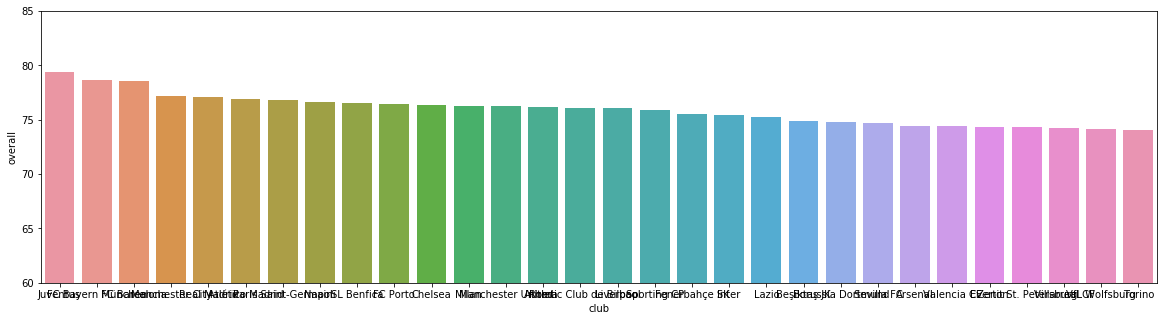

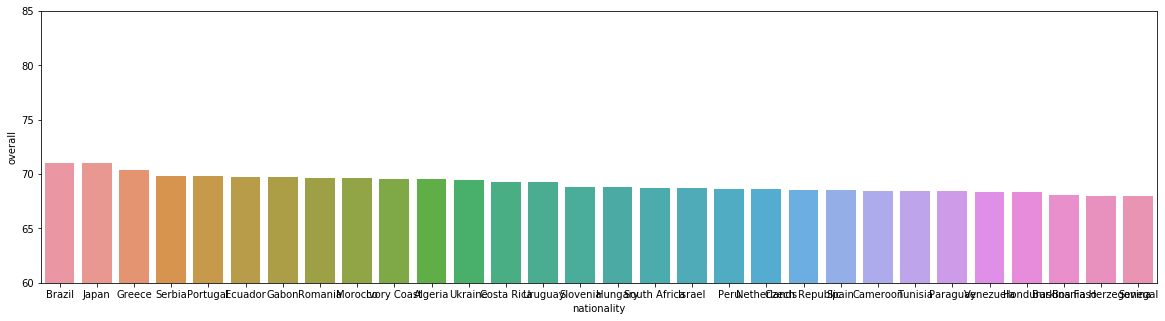

In [13]:
# GRAPHS OF TOP PLAYERS AND TEAMS IN 2016
def top(field, n):
    df16_club = df1601.groupby([field]).mean()
    df1601_club = df16_club.sort_values('overall', ascending = False).reset_index()

    ls = df1601.groupby([field]).sum()
    ls = ls[ls['count'] > 10].index

    df1602_club = df1601_club[df1601_club[field].isin(ls)]

    f, ax = plt.subplots(figsize = (20,5))
    sns.barplot(x = field, y = 'overall', data = df1602_club.iloc[:n])
    ax.set(ylim = (60,85))

top('club', 30)
top('nationality', 30)

In [14]:
#now we extract each players best position depending on their perfromace 
df1601['best_pos'] = df1601['player_positions'].str.split(',').str[0]
df16_players = df1601[df1601['best_pos']!= 'GK'].copy()
dct_pos = {'ST': 'Fwd_Centre','CF': 'Fwd_Centre','LW': 'Fwd_Winger','RW': 'Fwd_Winger','CM': 'Mid_Centre','CAM': 'Mid_Centre','CDM': 'Mid_Centre','LM': 'Mid_Side','RM': 'Mid_Side','CB': 'Back_Centre','LB': 'Back_Side','RB': 'Back_Side','LWB': 'Back_Winger','RWB': 'Back_Winger',}
df16_players['best_pos'] = df16_players['best_pos'].map(dct_pos)
s = ['Back_Centre','Back_Side','Back_Winger','Mid_Centre','Mid_Side','Fwd_Centre','Fwd_Winger']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# here we analyze the players attributes and convert then to
#overallof the year 
cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
for col in cols:
    df16_players.loc[:, 'n_'+col] = df16_players[col] / df16_players['overall']

req_col_basic = ['n_'+col for col in cols]

X = df16_players[req_col_basic]
y = df16_players['best_pos']


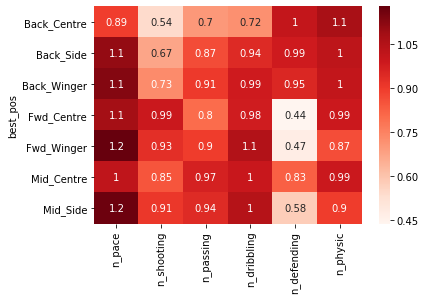

In [16]:
df16_analysis = df16_players[req_col_basic + ['best_pos']]
tmp = df16_analysis.groupby('best_pos').mean()
sns.heatmap(tmp, cmap="Reds", annot=True)

In [17]:
#FIFA 17 

In [18]:
# ANALISIS OF DATA FOR FIFA 2017
df17 = pd.read_csv(r'Desktop/players_17.csv')
df17['count'] = 1  
df1701 = df17[df17['value_eur'] > 1]
df1701.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,count
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,...,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3,1
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,29,1987-06-24,170,72,Argentina,FC Barcelona,...,59+3,59+3,59+3,63+3,58+3,46+3,46+3,46+3,58+3,1
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,24,1992-02-05,174,68,Brazil,FC Barcelona,...,59+3,59+3,59+3,64+3,59+3,46+3,46+3,46+3,59+3,1
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,30,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,29,1987-01-24,182,85,Uruguay,FC Barcelona,...,66+4,66+4,66+4,68+4,65+4,58+4,58+4,58+4,65+4,1


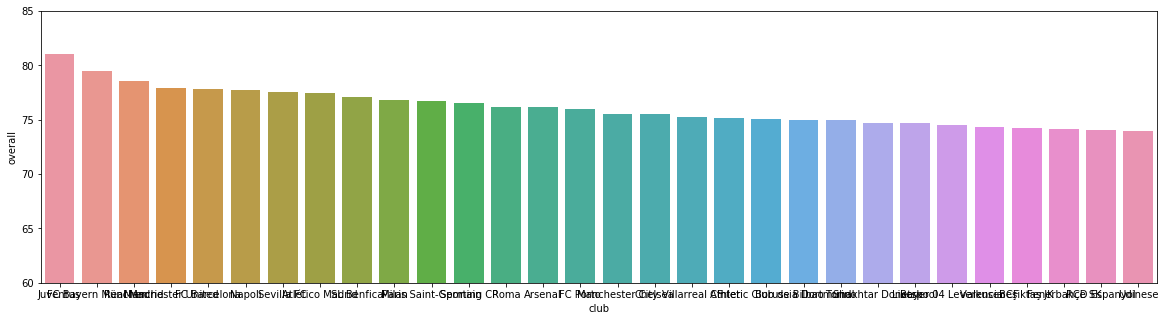

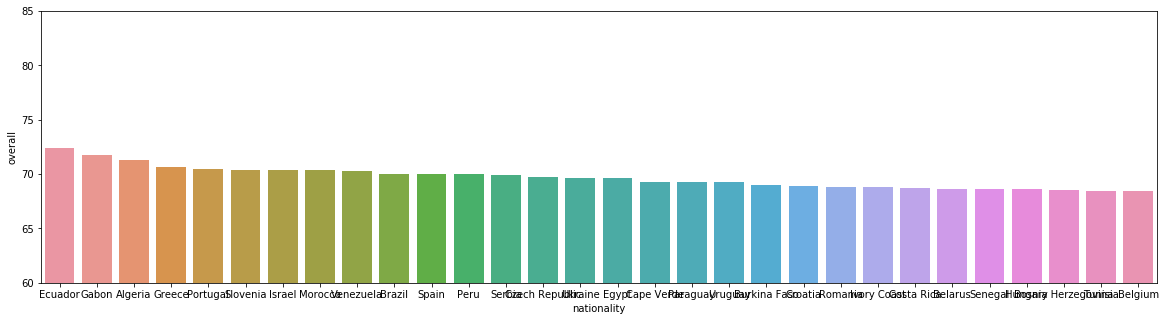

In [19]:
# GRAPHS OF TOP PLAYERS AND TEAMS IN 2017
def top(field, n):
    df17_club = df1701.groupby([field]).mean()
    df1701_club = df17_club.sort_values('overall', ascending = False).reset_index()

    ls = df1701.groupby([field]).sum()
    ls = ls[ls['count'] > 10].index

    df1702_club = df1701_club[df1701_club[field].isin(ls)]

    f, ax = plt.subplots(figsize = (20,5))
    sns.barplot(x = field, y = 'overall', data = df1702_club.iloc[:n])
    ax.set(ylim = (60,85))

top('club', 30)
top('nationality', 30)

In [20]:
#now we extract each players best position depending on their perfromace 
df1701['best_pos'] = df1701['player_positions'].str.split(',').str[0]
df17_players = df1701[df1701['best_pos']!= 'GK'].copy()
dct_pos = {'ST': 'Fwd_Centre','CF': 'Fwd_Centre','LW': 'Fwd_Winger','RW': 'Fwd_Winger','CM': 'Mid_Centre','CAM': 'Mid_Centre','CDM': 'Mid_Centre','LM': 'Mid_Side','RM': 'Mid_Side','CB': 'Back_Centre','LB': 'Back_Side','RB': 'Back_Side','LWB': 'Back_Winger','RWB': 'Back_Winger',}
df17_players['best_pos'] = df17_players['best_pos'].map(dct_pos)
s = ['Back_Centre','Back_Side','Back_Winger','Mid_Centre','Mid_Side','Fwd_Centre','Fwd_Winger']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


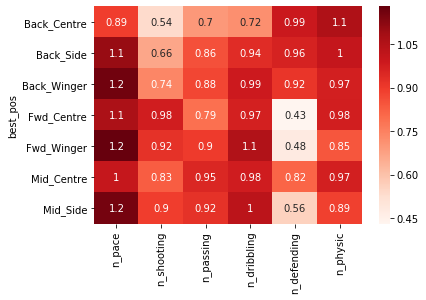

In [21]:
# here we analyze the players attributes and convert then to
#overall of the year 
cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
for col in cols:
    df17_players.loc[:, 'n_'+col] = df17_players[col] / df17_players['overall']

req_col_basic = ['n_'+col for col in cols]

X = df17_players[req_col_basic]
y = df17_players['best_pos']
df17_analysis = df17_players[req_col_basic + ['best_pos']]
tmp = df17_analysis.groupby('best_pos').mean()
sns.heatmap(tmp, cmap="Reds", annot=True)

In [22]:
#FIFA 18

In [23]:
# ANALISIS OF DATA FOR FIFA 2018
df18 = pd.read_csv(r'Desktop/players_18.csv')
df18['count'] = 1  
df1801 = df18[df18['value_eur'] > 1]
df1801.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,count
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,...,62+3,62+3,62+3,66+3,62+3,53+3,53+3,53+3,62+3,1
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,FC Barcelona,...,59+3,59+3,59+3,62+3,58+3,46+3,46+3,46+3,58+3,1
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,25,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,59+3,59+3,59+3,64+3,60+3,47+3,47+3,47+3,60+3,1
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,31,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,30,1987-01-24,182,86,Uruguay,FC Barcelona,...,66+4,66+4,66+4,68+4,65+4,59+4,59+4,59+4,65+4,1


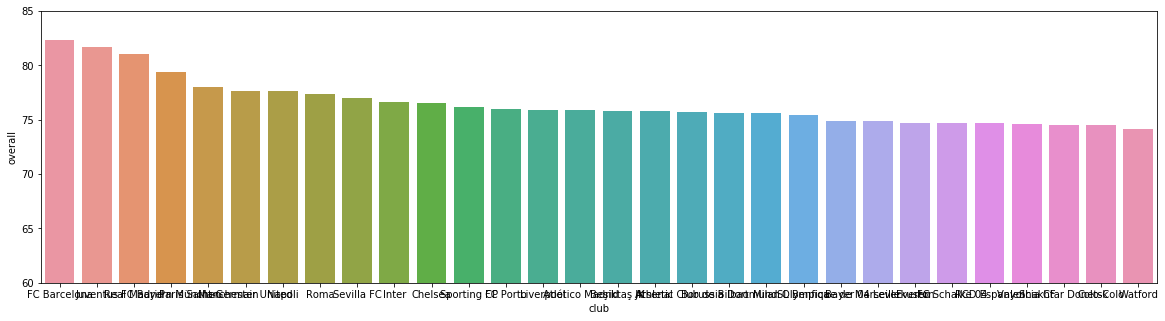

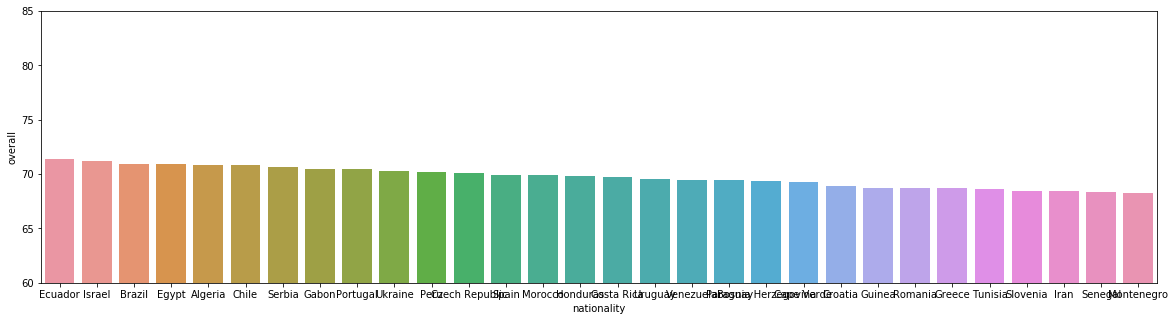

In [24]:
# GRAPHS OF TOP PLAYERS AND TEAMS IN 2018
def top(field, n):
    df18_club = df1801.groupby([field]).mean()
    df1801_club = df18_club.sort_values('overall', ascending = False).reset_index()

    ls = df1801.groupby([field]).sum()
    ls = ls[ls['count'] > 10].index

    df1802_club = df1801_club[df1801_club[field].isin(ls)]

    f, ax = plt.subplots(figsize = (20,5))
    sns.barplot(x = field, y = 'overall', data = df1802_club.iloc[:n])
    ax.set(ylim = (60,85))

top('club', 30)
top('nationality', 30)

In [25]:
#now we extract each players best position depending on their perfromace 
df1801['best_pos'] = df1801['player_positions'].str.split(',').str[0]
df18_players = df1801[df1801['best_pos']!= 'GK'].copy()
dct_pos = {'ST': 'Fwd_Centre','CF': 'Fwd_Centre','LW': 'Fwd_Winger','RW': 'Fwd_Winger','CM': 'Mid_Centre','CAM': 'Mid_Centre','CDM': 'Mid_Centre','LM': 'Mid_Side','RM': 'Mid_Side','CB': 'Back_Centre','LB': 'Back_Side','RB': 'Back_Side','LWB': 'Back_Winger','RWB': 'Back_Winger'}
df18_players['best_pos'] = df18_players['best_pos'].map(dct_pos)
s = ['Back_Centre','Back_Side','Back_Winger','Mid_Centre','Mid_Side','Fwd_Centre','Fwd_Winger']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


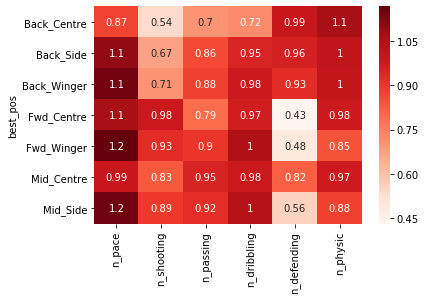

In [26]:
# here we analyze the players attributes and convert then to
#overallof the year 
cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
for col in cols:
    df18_players.loc[:, 'n_'+col] = df18_players[col] / df18_players['overall']

req_col_basic = ['n_'+col for col in cols]

X = df18_players[req_col_basic]
y = df18_players['best_pos']
df18_analysis = df18_players[req_col_basic + ['best_pos']]
tmp = df18_analysis.groupby('best_pos').mean()
sns.heatmap(tmp, cmap="Reds", annot=True)

In [27]:
#DATA COMBINATION AND AVERAGE OF ALL ATTRIBUTES PER POSITIONS OF FIFA 2016,2017,2018

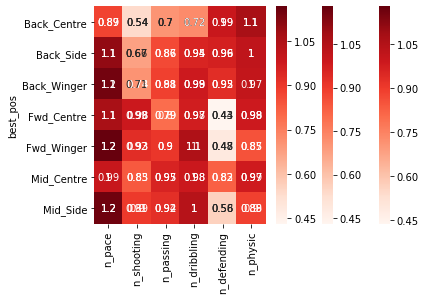

In [28]:
df16_analysis = df16_players[req_col_basic + ['best_pos']]
tmp = df16_analysis.groupby('best_pos').mean()
sns.heatmap(tmp, cmap="Reds", annot=True)

df17_analysis = df17_players[req_col_basic + ['best_pos']]
tmp = df17_analysis.groupby('best_pos').mean()
sns.heatmap(tmp, cmap="Reds", annot=True)

df18_analysis = df18_players[req_col_basic + ['best_pos']]
tmp = df18_analysis.groupby('best_pos').mean()
sns.heatmap(tmp, cmap="Reds", annot=True)



In [29]:
#Introduce and analyze the data 
df = pd.read_csv(r'Desktop/players_19.csv')
df['count'] = 1  
df = df[df['value_eur'] > 1]
df.head(20)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,count
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,1
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2,1
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,1
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,1
5,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,32,1986-03-30,184,82,Spain,Real Madrid,...,83+3,83+3,83+3,82+3,84+3,87+3,87+3,87+3,84+3,1
6,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,31,1987-01-24,182,86,Uruguay,FC Barcelona,...,68+5,68+5,68+5,69+5,66+5,63+5,63+5,63+5,66+5,1
7,177003,https://sofifa.com/player/177003/luka-modric/1...,L. Modrić,Luka Modrić,32,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,1
8,183277,https://sofifa.com/player/183277/eden-hazard/1...,E. Hazard,Eden Hazard,27,1991-01-07,173,74,Belgium,Chelsea,...,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,1
9,200389,https://sofifa.com/player/200389/jan-oblak/19/...,J. Oblak,Jan Oblak,25,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


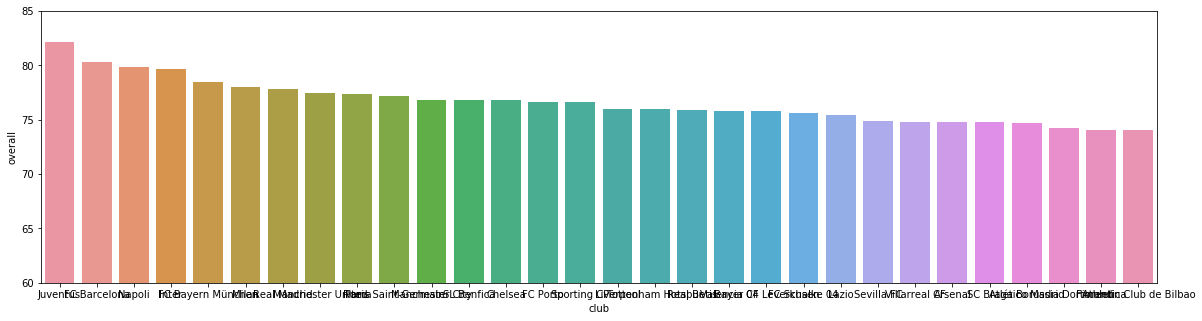

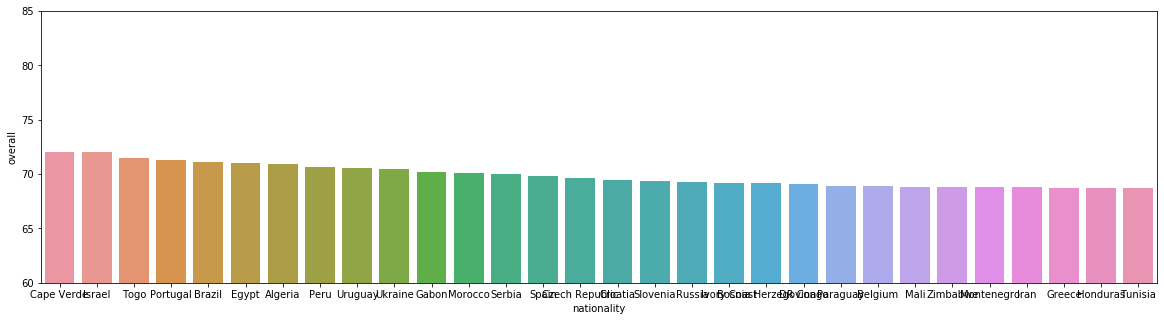

In [30]:
# We define this function to find what clubs have the highest attribute 
#averages and create a graph showing that 
def top(field, n):
    df_club = df.groupby([field]).mean()
    df_club = df_club.sort_values('overall', ascending = False).reset_index()

    ls = df.groupby([field]).sum()
    ls = ls[ls['count'] > 10].index

    df_club = df_club[df_club[field].isin(ls)]

    f, ax = plt.subplots(figsize = (20,5))
    sns.barplot(x = field, y = 'overall', data = df_club.iloc[:n])
    ax.set(ylim = (60,85))

top('club', 30)
top('nationality', 30)

In [31]:
#now we extract each players best position depending in their preformace in them
df['best_pos'] = df['player_positions'].str.split(',').str[0]
df_players = df[df['best_pos']!= 'GK'].copy()

dct_pos = {
    'ST': 'Fwd_Centre',
    'CF': 'Fwd_Centre',
    'LW': 'Fwd_Winger',
    'RW': 'Fwd_Winger',
    'CM': 'Mid_Centre',
    'CAM': 'Mid_Centre',
    'CDM': 'Mid_Centre',
    'LM': 'Mid_Side',
    'RM': 'Mid_Side',
    'CB': 'Back_Centre',
    'LB': 'Back_Side',
    'RB': 'Back_Side',
    'LWB': 'Back_Winger',
    'RWB': 'Back_Winger',
}

df_players['best_pos'] = df_players['best_pos'].map(dct_pos)

s = ['Back_Centre',
 'Back_Side',
 'Back_Winger',
 'Mid_Centre',
 'Mid_Side',
 'Fwd_Centre',
 'Fwd_Winger']

In [32]:
# here we analyze the players attributes and convert then to
#overall easier to understand
cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
for col in cols:
    df_players.loc[:, 'n_'+col] = df_players[col] / df_players['overall']

req_col_basic = ['n_'+col for col in cols]

X = df_players[req_col_basic]
y = df_players['best_pos']



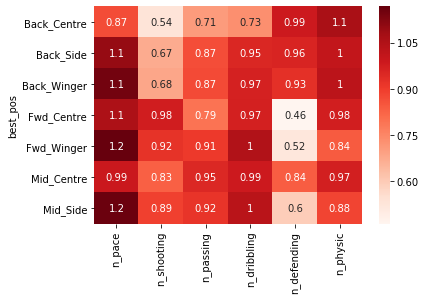

In [33]:
#Here we analyze de data to see what attribute is best and more matching for each position
df_analysis = df_players[req_col_basic + ['best_pos']]
tmp = df_analysis.groupby('best_pos').mean()
sns.heatmap(tmp, cmap="Reds", annot=True)

In [10]:
# AS WE CAN SEE EVERY YEAR THE TOP PLAYERS CHANGE DEPENDING IN THE PEFROMANCE ON THE PAST YEAR:
#2016 TOP PLAYERS WHERE IN THE ORDER: 1 MESSI 2 RONALDO 3 A. ROBBEN 
#2017 TOP PLAYERS WHERE IN ORDER : 1 RONALDO 2 MESSI 3 NEYMAR 
#2018 TOP PLAYERS WHERE IN ORDER: 1 RONALDO 2 MESSI 3 NEYMAR 
# WE CAN ALSO OBSERVE THE CHANGE IN THE TOP TEAMS HOW FC BARCELON AWAS CONSIDERED TEH BEST TEAM IN 2017
# BUT FOLLOWING JUVENTUS WAS CONSIDERED THE BEST IN 2016, AND 2018
#AS WELL AS SEEING THE CHANGE IN THE TOP NATIONS 
#FINALLY OU RPURPOSE WAS TO FIND WICH PLAYERS AND POSITIONS ARE SUITED WITH THE TOP ATTRIBUTE WE SEE IN THE AVERAGE CHART
#THE MOST IMPORTANT ATTRIBUTE COSISTANTLY IN PACE AND PHYSIC THROUGH OUT ALL POSITIONS 
# BUT WE CAN IDENTIFY THE SHIFT OF IMPORTANCE IN SHOOTING AMD DRIBBLING ALONG THE YEARS THEY AHVE INCREASED AS PLAYERS 
# DEMAND STRONGER SHOOTERS AND DRIBBLERS TO ENJOY THE GAME MORE 